In [1]:
from tqdm.notebook import tqdm
import numpy
import matplotlib.pyplot as plt
import pandas

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [2]:
house_data = pandas.read_csv('data/house_price/data.csv')
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
imp = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition']
Y = house_data['price']
X = []
for val in imp:
    X.append(list(house_data[val]))
X = numpy.array(X).T
len(X)

4600

In [4]:
x_train = X[:3500]
y_train = Y[:3500]

x_test = X[3500:]
y_test = Y[3500:]

(len(x_train),len(y_train)),(len(x_test),len(y_test))

((3500, 3500), (1100, 1100))

In [16]:
def build_model():
    model = Sequential()
    model.add(keras.Input(shape=(6,)))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='relu'))
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.mae
    )
    return model
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                112       
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,393
Trainable params: 5,393
Non-traina

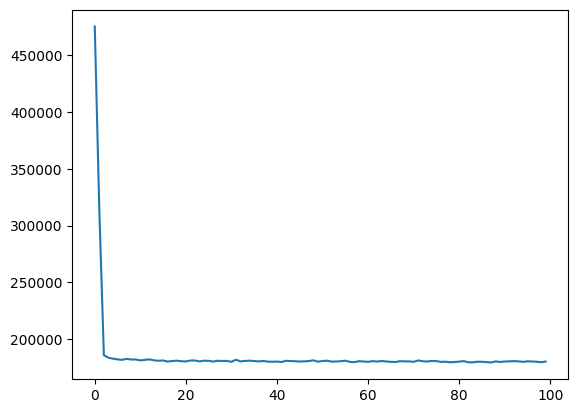

In [17]:
h = model.fit(X,Y,batch_size=32,epochs=100,verbose=False)
plt.plot(range(len(h.history['loss'])),h.history['loss'])
plt.show()

In [10]:
y_test = list(y_test)

In [14]:
for i in tqdm(range(len(x_test))):
    pred = model.predict(numpy.array([x_test[i]]),verbose=False)[0]
    print('pred:',pred,'|real:',y_test[i])

  0%|          | 0/1100 [00:00<?, ?it/s]

pred: [0.] |real: 451000.0
pred: [0.] |real: 202000.0
pred: [0.] |real: 1410000.0
pred: [0.] |real: 471000.0
pred: [0.] |real: 827000.0
pred: [0.] |real: 235000.0
pred: [0.] |real: 216500.0
pred: [0.] |real: 359000.0
pred: [0.] |real: 252500.0
pred: [0.] |real: 370000.0
pred: [0.] |real: 663000.0
pred: [0.] |real: 971971.0
pred: [0.] |real: 420000.0
pred: [0.] |real: 330675.0
pred: [0.] |real: 240000.0
pred: [0.] |real: 334888.0
pred: [0.] |real: 414000.0
pred: [0.] |real: 782900.0
pred: [0.] |real: 525000.0
pred: [0.] |real: 429900.0
pred: [0.] |real: 390000.0
pred: [0.] |real: 224000.0
pred: [0.] |real: 257500.0
pred: [0.] |real: 665000.0
pred: [0.] |real: 327000.0
pred: [0.] |real: 425000.0
pred: [0.] |real: 687500.0
pred: [0.] |real: 672500.0
pred: [0.] |real: 140000.0
pred: [0.] |real: 215500.0
pred: [0.] |real: 464900.0
pred: [0.] |real: 417000.0
pred: [0.] |real: 453000.0
pred: [0.] |real: 700000.0
pred: [0.] |real: 1619999.0
pred: [0.] |real: 259500.0
pred: [0.] |real: 460000.0

KeyboardInterrupt: 